In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/car-dekho-data/car data.csv
/kaggle/input/car-dekho-data/cardata.R


In [2]:
a=pd.read_csv("../input/car-dekho-data/car data.csv")
a

,Car_Name,company,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,maruti suzuki,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,maruti suzuki,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,maruti suzuki,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,maruti suzuki,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,maruti suzuki,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...,...
296,city,honda,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,honda,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,honda,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,honda,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [3]:
a.isnull().sum()

Car_Name         0
company          0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [4]:
a.shape

(301, 10)

In [5]:
print(a["Seller_Type"].unique())

['Dealer' 'Individual']


In [6]:
print(a["Transmission"].unique())
print(a["Owner"].unique())

['Manual' 'Automatic']
[0 1 3]


In [7]:
a.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [8]:
a.columns

Index(['Car_Name', 'company', 'Year', 'Selling_Price', 'Present_Price',
       'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [9]:
b=a[[  'Year', 'Selling_Price', 'Present_Price',
       'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [10]:
b

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [11]:
b.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [12]:
import pandas as pd
import numpy as np

In [13]:
b["Current_Year"]=2020

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [14]:
b.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020


In [15]:
b["No_Years_cars"]=b["Current_Year"]-b["Year"]

In [16]:
b.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,No_Years_cars
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020,6
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020,7
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020,3
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020,9
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020,6


In [17]:
b.drop(["Year"],axis=1,inplace=True)

In [18]:
b

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,No_Years_cars
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020,6
...,...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,Diesel,Dealer,Manual,0,2020,4
297,4.00,5.90,60000,Petrol,Dealer,Manual,0,2020,5
298,3.35,11.00,87934,Petrol,Dealer,Manual,0,2020,11
299,11.50,12.50,9000,Diesel,Dealer,Manual,0,2020,3


In [19]:
b.drop(["Current_Year"],axis=1,inplace=True)

In [20]:
b

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No_Years_cars
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6
...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,Diesel,Dealer,Manual,0,4
297,4.00,5.90,60000,Petrol,Dealer,Manual,0,5
298,3.35,11.00,87934,Petrol,Dealer,Manual,0,11
299,11.50,12.50,9000,Diesel,Dealer,Manual,0,3


In [21]:
b.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No_Years_cars
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [22]:
b=pd.get_dummies(b,drop_first=True)

In [23]:
b.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,No_Years_cars,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [24]:
b.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,No_Years_cars,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
No_Years_cars,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


In [25]:
import seaborn as sns

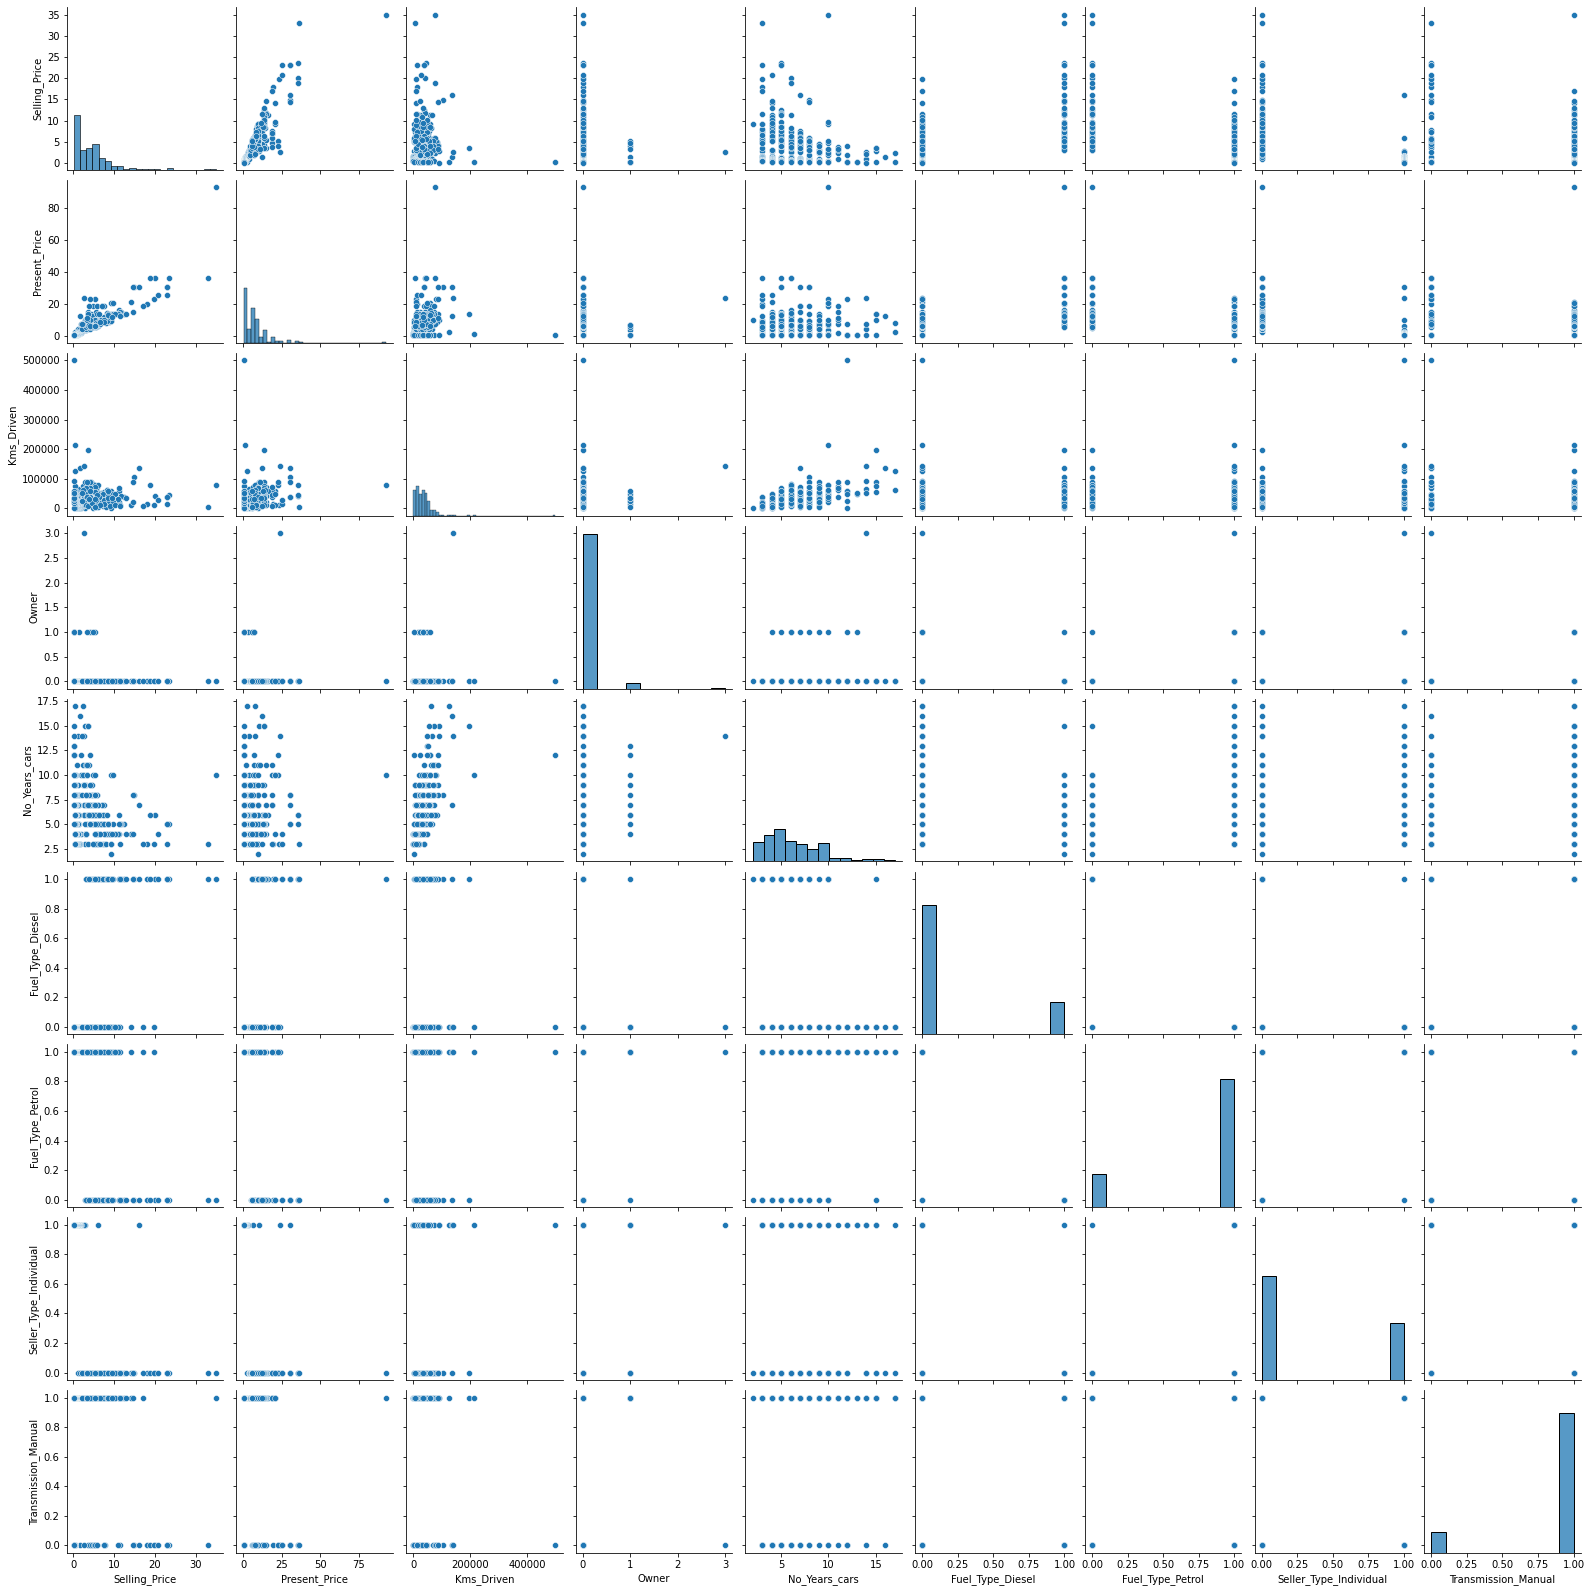

In [26]:
sns.pairplot(b)

In [27]:
!pip install matplotlib

In [28]:
%matplotlib inline

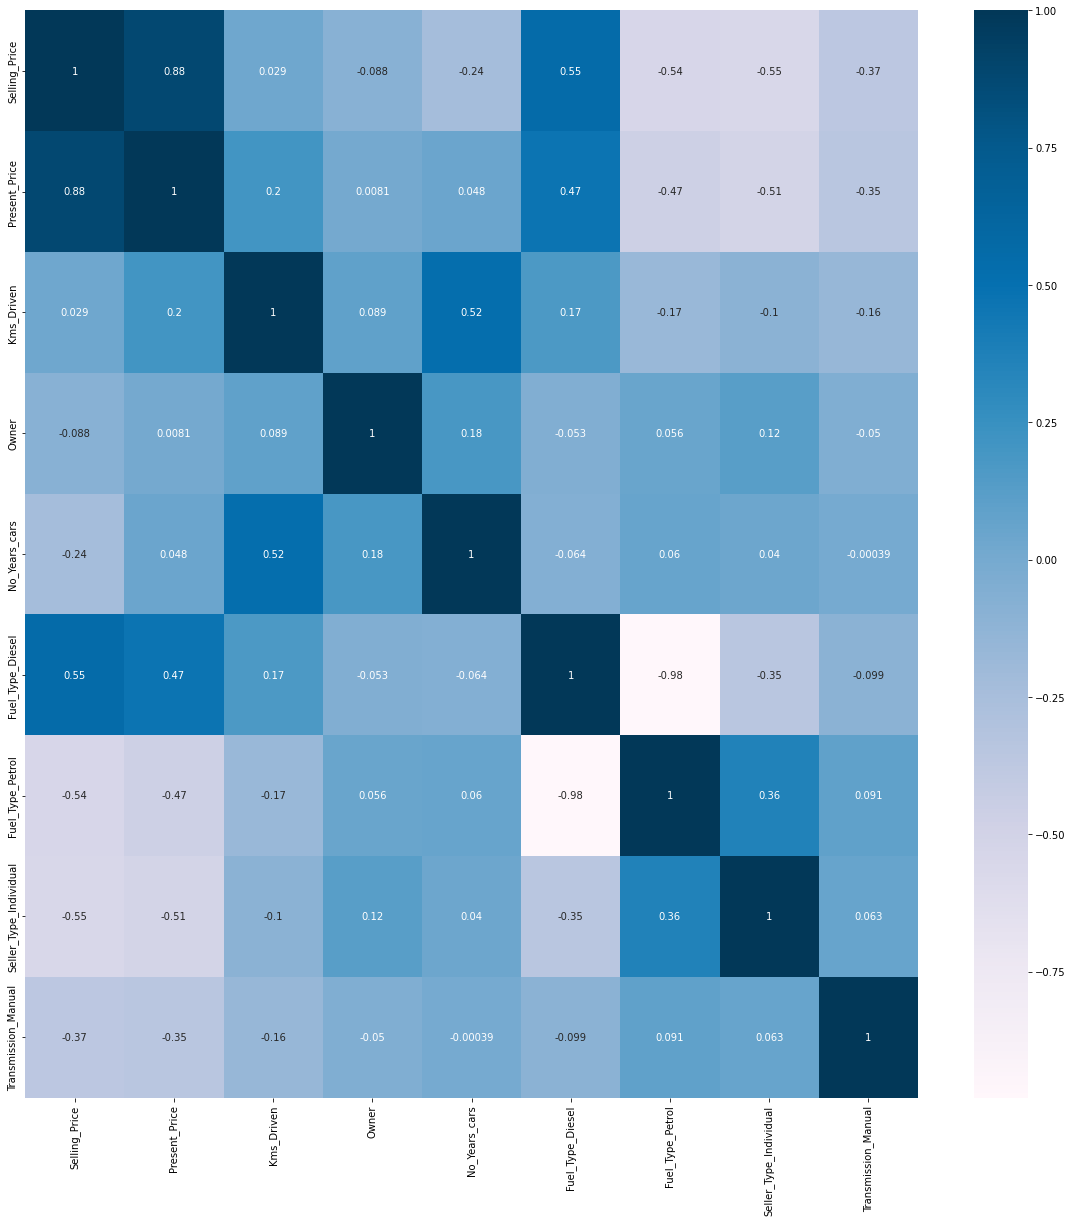

In [29]:
import matplotlib.pyplot as plt
correlation=b.corr()
top_corr_features=correlation.index
plt.figure(figsize=(20,20))
s=sns.heatmap(b[top_corr_features].corr(),annot=True,cmap="PuBu")

In [30]:
b.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,No_Years_cars,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [31]:
X=b.iloc[:,1:]
Y=b.iloc[:,0]

In [32]:
X.head()

,Present_Price,Kms_Driven,Owner,No_Years_cars,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,6,0,1,0,1
1,9.54,43000,0,7,1,0,0,1
2,9.85,6900,0,3,0,1,0,1
3,4.15,5200,0,9,0,1,0,1
4,6.87,42450,0,6,1,0,0,1


In [33]:
Y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [34]:
!pip install sklearn
from sklearn.ensemble import ExtraTreesRegressor

In [35]:
model=ExtraTreesRegressor()
model.fit(X,Y)

ExtraTreesRegressor()

In [36]:
print(model.feature_importances_)

[0.36827119 0.04229274 0.00080623 0.07213561 0.22247267 0.014061
 0.13130751 0.14865306]


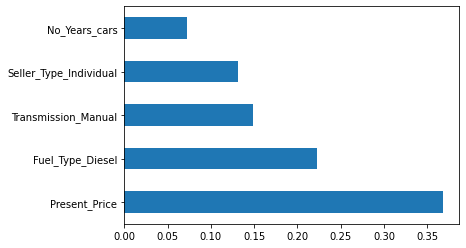

In [37]:
feature_importance=pd.Series(model.feature_importances_,index=X.columns)
feature_importance.nlargest(5).plot(kind="barh")
plt.show()

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [39]:
X_train

,Present_Price,Kms_Driven,Owner,No_Years_cars,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
137,0.787,16000,0,7,0,1,1,1
245,9.400,71000,0,8,1,0,0,1
10,3.600,2135,0,3,0,1,0,1
2,9.850,6900,0,3,0,1,0,1
249,7.600,17000,0,4,0,1,0,1
...,...,...,...,...,...,...,...,...
24,4.410,56879,0,7,0,1,0,1
263,7.700,16002,0,4,0,1,0,1
126,0.950,1300,0,3,0,1,1,1
253,9.900,48000,0,6,1,0,0,1


In [40]:
X_train.shape

(240, 8)

In [41]:
from sklearn.ensemble import RandomForestRegressor
rf_random=RandomForestRegressor()

In [42]:
import numpy as np
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [43]:
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=12)]
max_features=["auto","squrt"]
max_depth=[int(x) for x in np.linspace(5,30,num=6)]
min_samples_split=[2,5,10,15,100]
min_samples_leaf=[1,2,5,10]


In [44]:
from sklearn.model_selection import RandomizedSearchCV

In [45]:
random_grid={'n_estimators':n_estimators,
             'max_features':max_features,
             'max_depth':max_depth,
             'min_samples_split':min_samples_split,
             'min_samples_leaf':min_samples_leaf}

In [46]:
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'squrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [47]:
rf=RandomForestRegressor()

In [48]:
rf_random=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter=10,cv=5,verbose=2,random_state=42,n_jobs=1)

In [49]:
rf_random.fit(X_train,Y_train) 

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=squrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.4s
[CV] END max_depth=10, max_features=squrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.4s
[CV] END max_depth=10, max_features=squrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.4s
[CV] END max_depth=10, max_features=squrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.4s
[CV] END max_depth=10, max_features=squrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.4s
[CV] END max_depth=15, max_features=squrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   0.5s
[CV] END max_depth=15, max_features=squrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   0.5s
[CV] END max_depth=15, max_features=squrt, min_samples_leaf=2, min_samples_split=10, n_e

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/opt/conda/lib/python3.7/site-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/opt/conda/lib/python3.7/site-packages/joblib/para

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'squrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [50]:
predictions=rf_random.predict(X_test)

In [51]:
predictions

array([ 5.45088045,  5.65729771,  5.64790655,  0.45710942, 10.29427131,
        5.04890307,  0.54041593,  4.41100482,  9.90028136,  6.87828179,
        4.83518054,  1.12724359,  5.64943036,  9.60592406,  7.86520059,
        4.92179943,  4.67070431,  0.58515411,  7.64302109,  2.89361763,
        0.64572997,  5.42516401,  8.36112328,  5.40156683,  0.5323897 ,
        7.7582803 ,  3.17706572,  4.98018676, 22.59285387,  0.48640772,
        5.09162109,  4.51791933,  4.05466004,  7.61065359,  5.39913696,
        2.74175853,  4.00165483,  0.65247178,  1.32395383,  1.14257307,
        0.48930691,  0.3800857 ,  0.5317181 ,  2.95846719,  0.4338716 ,
        8.25858486,  0.54907178,  0.44419325,  4.45862747,  7.31434078,
        0.29590646,  2.02768304, 22.44527093, 15.13808711, 13.67524771,
        3.06654369,  7.71582674,  3.56179936,  5.96032466,  4.41848108,
        1.15904043])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

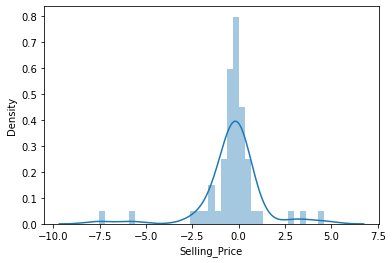

In [52]:
sns.distplot(Y_test-predictions)

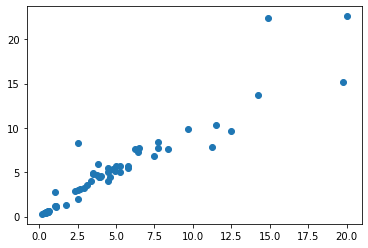

In [53]:
plt.scatter(Y_test,predictions)